In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix
from sklearn.decomposition import PCA

In [51]:
books_df = pd.read_csv("original_data/books_data_with_index.csv")
books_df_subset = books_df.iloc[:300]

In [52]:
from NLP_preprocessing import create_BOW_feature_for_english_descriptions, add_BOW_PCA_to_df, identify_language

books_df_subset["description_language"] = books_df_subset["description"].map(identify_language, na_action='ignore')
create_BOW_feature_for_english_descriptions(books_df_subset, "description", "english_BOW")
# add_BOW_PCA_to_df(books_df_subset, "english_BOW", 4)

/var/folders/62/rv9lbyxx6l110tffps2wcg2r0000gn/T/ipykernel_30853/2422547884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_df_subset["description_language"] = books_df_subset["description"].map(identify_language, na_action='ignore')
/Users/meganguidry/Documents/data_science_codeop/Group-project/NLP_preprocessing.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["english_BOW"] = ""


In [53]:
books_df_subset.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,index,description_language,english_BOW
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,0,NaN,
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,1,English,illustrator lane smith energetic cartoon surre...
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN,2,English,planning worship fifteen practices congregatio...
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN,3,English,sever car accident one day reunite miles away ...
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN,4,NaN,


In [58]:
%load_ext autoreload
%autoreload 2

In [60]:
from NLP_preprocessing import identify_language, create_BOW_feature_for_english_descriptions, add_TFIDF_PCA_to_df

ImportError: cannot import name 'add_TFIDF_PCA_to_df' from 'NLP_preprocessing' (/Users/meganguidry/Documents/data_science_codeop/Group-project/NLP_preprocessing.py)

In [ ]:
# Testing out code from filipa:

In [42]:
# read in the dataframe that we want to process
books_df = pd.read_csv("original_data/books_data_with_index.csv")
books_df_subset = books_df.iloc[:300]

In [43]:
# Identify the language of the book description and create a new feature in the given dataframe 
# called "description_language" that captures this label:

books_df_subset["description_language"] = books_df_subset["description"].map(identify_language, na_action='ignore')

/var/folders/62/rv9lbyxx6l110tffps2wcg2r0000gn/T/ipykernel_30853/2244310647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_df_subset["description_language"] = books_df_subset["description"].map(identify_language, na_action='ignore')


In [44]:
# Create a bag of words for each row in the dataframe that has an english book description and save this in a 
# new column called "english_BOW". This bag of words feature transforms the book description into tokens that can be used
# dimensionality reduction via PCA:
create_BOW_feature_for_english_descriptions(books_df_subset, "description", "english_BOW")

/Users/meganguidry/Documents/data_science_codeop/Group-project/NLP_preprocessing.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["english_BOW"] = ""


In [55]:
# A common practice is to choose a number of dimensions that add up to a sufficiently large portion of the 
# variance. Usually, a convention will be to retain 95% of the variance. Thus, we will input 0.95 for the thrid 
# argument in our PCA function below:

pca_model = add_BOW_PCA_to_df(books_df_subset, "english_BOW", 0.95)

/Users/meganguidry/Documents/data_science_codeop/Group-project/NLP_preprocessing.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(location, f"PC{i+1}", PCA_components[:,i].tolist())
/Users/meganguidry/Documents/data_science_codeop/Group-project/NLP_preprocessing.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(location, f"PC{i+1}", PCA_components[:,i].tolist())
/Users/meganguidry/Documents/data_science_codeop/Group-project/NLP_preprocessing.py:94: PerformanceWarning: DataFrame is highly fragmented.  T

In [56]:
books_df_subset.head(2)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,...,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,...,0.426339,-0.492777,-0.541506,-0.122563,0.019491,-0.192165,0.180679,-0.477868,-0.194873,-0.253722
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,...,-0.206515,-0.312804,0.126912,-0.006719,0.018420,0.110120,0.103958,0.177774,0.041321,0.072313


In [57]:
print(pca_model.explained_variance_ratio_.sum())

0.9504455951825566


In [1]:
import pandas as pd
clean_df = pd.read_csv("English_fiction_pre_PCA_3.csv")

In [2]:
from NLP_preprocessing import identify_language, create_BOW_feature_for_english_descriptions, add_TFIDF_tSVD_to_df
create_BOW_feature_for_english_descriptions(clean_df, "description", "english_BOW")

pandas ['ArrowDtype', 'BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt8Dtype', '__all__', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_built_with_meson', '_config', '_is_numpy_dev', '_libs', '_pandas_datetime_CAPI', '_pandas_parser_CAPI', '_testing', '_typing', '_version_meson', 'annotations', 'api', 'array', 'arrays', 'bdate_range', 'compat',

In [3]:
clean_df.head()

,Title,description,authors,image,previewLink,publisher,infoLink,categories,index,reviews number,average rating,median rating,min review date_x,min review date_y,weighted rating,date,year,description_language,english_BOW
0,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['fiction'],3,32,3.718750,5.0,2005-02-14,2006-07-01,3.938400,2005-02-01,2005.0,English,julia thoma find life spin control death husb...
1,The Forbidden Stories of Marta Veneranda,"Marta Veneranda, a Latina neoyorkina, finds th...",['Sonia Rivera-Valdes'],http://books.google.com/books/content?id=A7aYb...,http://books.google.nl/books?id=A7aYbAvagu8C&p...,Seven Stories Press,http://books.google.nl/books?id=A7aYbAvagu8C&d...,['fiction'],24,1,5.000000,5.0,2005-01-24,2005-01-24,4.306145,2001-03-06,2001.0,English,marta veneranda latina neoyorkina find inspir...
2,Tess and the Highlander,"In 1543, on a windswept isle off of Scotland, ...",['May Mcgoldrick'],http://books.google.com/books/content?id=VmCRS...,http://books.google.nl/books?id=VmCRSPmY3WkC&d...,Harper Collins,http://books.google.nl/books?id=VmCRSPmY3WkC&d...,['juvenile fiction'],42,17,4.235294,5.0,2002-10-22,2011-05-25,4.256189,2002-11-01,2002.0,English,1543 windswept isl scotland seventeen year ol...
3,"Eight Men And A Lady (Elizabeth Sinclair, Harl...",Eight Men And A Lady by Elizabeth Sinclair rel...,['Elizabeth Sinclair'],http://books.google.com/books/content?id=Z6uzJ...,http://books.google.nl/books?id=Z6uzJgLWViUC&q...,Harlequin Treasury-Harlequin American Romance 90s,http://books.google.nl/books?id=Z6uzJgLWViUC&d...,['fiction'],49,2,5.000000,5.0,1998-04-16,2000-05-14,4.336313,1997-01-01,1997.0,English,eight men ladi elizabeth sinclair releas mar ...
4,Night World: Daughters Of Darkness,"""There’s something strange about the new girls...",['L.J. Smith'],http://books.google.com/books/content?id=c9icD...,http://books.google.nl/books?id=c9icDQAAQBAJ&p...,Simon and Schuster,http://books.google.nl/books?id=c9icDQAAQBAJ&d...,['juvenile fiction'],73,134,4.768657,5.0,1996-08-07,2012-09-18,4.701517,2016-12-06,2016.0,English,’ someth strang new girl town briar creek ore...


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df["english_BOW"])

In [5]:
len(vectorizer.vocabulary_.items())

51289

In [6]:
X.shape

(26774, 51289)

In [7]:
clean_df.head()

,Title,description,authors,image,previewLink,publisher,infoLink,categories,index,reviews number,average rating,median rating,min review date_x,min review date_y,weighted rating,date,year,description_language,english_BOW
0,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['fiction'],3,32,3.718750,5.0,2005-02-14,2006-07-01,3.938400,2005-02-01,2005.0,English,julia thoma find life spin control death husb...
1,The Forbidden Stories of Marta Veneranda,"Marta Veneranda, a Latina neoyorkina, finds th...",['Sonia Rivera-Valdes'],http://books.google.com/books/content?id=A7aYb...,http://books.google.nl/books?id=A7aYbAvagu8C&p...,Seven Stories Press,http://books.google.nl/books?id=A7aYbAvagu8C&d...,['fiction'],24,1,5.000000,5.0,2005-01-24,2005-01-24,4.306145,2001-03-06,2001.0,English,marta veneranda latina neoyorkina find inspir...
2,Tess and the Highlander,"In 1543, on a windswept isle off of Scotland, ...",['May Mcgoldrick'],http://books.google.com/books/content?id=VmCRS...,http://books.google.nl/books?id=VmCRSPmY3WkC&d...,Harper Collins,http://books.google.nl/books?id=VmCRSPmY3WkC&d...,['juvenile fiction'],42,17,4.235294,5.0,2002-10-22,2011-05-25,4.256189,2002-11-01,2002.0,English,1543 windswept isl scotland seventeen year ol...
3,"Eight Men And A Lady (Elizabeth Sinclair, Harl...",Eight Men And A Lady by Elizabeth Sinclair rel...,['Elizabeth Sinclair'],http://books.google.com/books/content?id=Z6uzJ...,http://books.google.nl/books?id=Z6uzJgLWViUC&q...,Harlequin Treasury-Harlequin American Romance 90s,http://books.google.nl/books?id=Z6uzJgLWViUC&d...,['fiction'],49,2,5.000000,5.0,1998-04-16,2000-05-14,4.336313,1997-01-01,1997.0,English,eight men ladi elizabeth sinclair releas mar ...
4,Night World: Daughters Of Darkness,"""There’s something strange about the new girls...",['L.J. Smith'],http://books.google.com/books/content?id=c9icD...,http://books.google.nl/books?id=c9icDQAAQBAJ&p...,Simon and Schuster,http://books.google.nl/books?id=c9icDQAAQBAJ&d...,['juvenile fiction'],73,134,4.768657,5.0,1996-08-07,2012-09-18,4.701517,2016-12-06,2016.0,English,’ someth strang new girl town briar creek ore...


In [9]:
from sklearn.preprocessing import StandardScaler
# Determine the column names for our dense matrix and create a dataframe with the vocabulary as columns:

# convert the tfidf matrix to a dense matrix
dense_X = X.toarray()

# Scale the data
scale = StandardScaler()
scaled_data = scale.fit_transform(dense_X)

# Determine the column names for our dense matrix and create a dataframe with the vocabulary as columns:
temp_dict = {}
for counter, i in enumerate(list(vectorizer.vocabulary_.items())):
        temp_dict[i[1]] = i[0]

column_names = []
for i in range(len(temp_dict)):
    column_names.append(temp_dict[i])

# Convert the array back into a dataframe:
dense_X_dataframe=pd.DataFrame(dense_X, columns= column_names) 

KeyboardInterrupt: 

In [ ]:
word_freq = dense_X_dataframe.sum().sort_values(ascending=False)

In [138]:
word_freq_df = word_freq.reset_index().rename(columns={"index": "token", 0: "freq"})

In [140]:
word_freq_df.head()

,token,freq
0,new,398.533197
1,one,338.375951
2,first,318.008406
3,life,311.544533
4,world,301.717351


array([[<Axes: title={'center': 'freq'}>]], dtype=object)

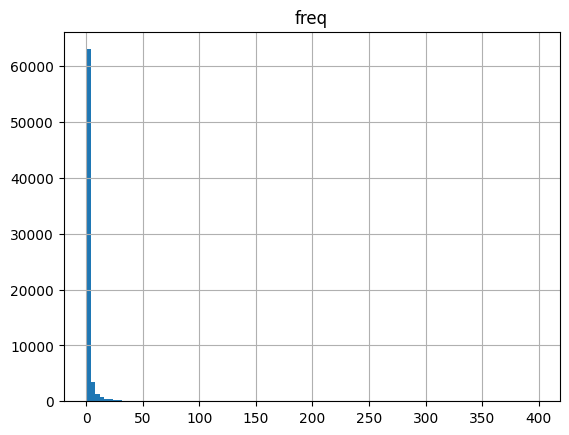

In [146]:
word_freq_df.hist(bins=100)

In [147]:
greater_2 = word_freq_df[word_freq_df["freq"]>2]

In [148]:
greater_2.shape

(12635, 2)

In [149]:
greater_1 = word_freq_df[word_freq_df["freq"]>1]

In [150]:
greater_1.shape

(19681, 2)

In [155]:
word_freq_df.tail(50)

,token,freq
70520,도적,0.022789
70521,도피,0.022789
70522,마련해,0.022789
70523,마술사,0.022789
70524,마슈꿀의,0.022789
70525,마찬가지로,0.022789
70526,만나는,0.022789
70527,만발한,0.022789
70528,만에,0.022789
70529,많은,0.022789


In [160]:
test_3 = word_freq_df[word_freq_df["freq"]>0.3]
print(test_3.shape)
test_3.tail(50)

(40255, 2)


,token,freq
40205,symphonic,0.300545
40206,carlucci,0.300544
40207,folklorists,0.300523
40208,sixpence,0.300519
40209,huss,0.300516
40210,predates,0.300473
40211,figaro,0.300468
40212,ménages,0.300468
40213,pleasingly,0.300468
40214,judgments,0.300455


In [106]:
len(column_names)

70570

In [100]:
tSVD_model, tSVD_components = add_TFIDF_tSVD_to_df(clean_df, "english_BOW", 150)

KeyError: 'english_BOW'

In [93]:
tSVD_components.shape

(26774, 150)

In [94]:
tSVD_model.explained_variance_ratio_.sum()

0.05545201065080815

In [95]:
clean_df_subset.head()

,Title,description,authors,image,previewLink,publisher,infoLink,categories,index,reviews number,...,tSVD141,tSVD142,tSVD143,tSVD144,tSVD145,tSVD146,tSVD147,tSVD148,tSVD149,tSVD150
0,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['fiction'],3,32,...,-5.199056,-1.609572,3.166756,-2.271033,0.437599,-3.623814,2.321892,0.777673,-2.086041,-1.894366
1,The Forbidden Stories of Marta Veneranda,"Marta Veneranda, a Latina neoyorkina, finds th...",['Sonia Rivera-Valdes'],http://books.google.com/books/content?id=A7aYb...,http://books.google.nl/books?id=A7aYbAvagu8C&p...,Seven Stories Press,http://books.google.nl/books?id=A7aYbAvagu8C&d...,['fiction'],24,1,...,0.025198,-0.022277,0.097890,-0.467944,-0.070988,0.027377,-0.595296,-0.102663,-0.383290,-0.005166
2,Tess and the Highlander,"In 1543, on a windswept isle off of Scotland, ...",['May Mcgoldrick'],http://books.google.com/books/content?id=VmCRS...,http://books.google.nl/books?id=VmCRSPmY3WkC&d...,Harper Collins,http://books.google.nl/books?id=VmCRSPmY3WkC&d...,['juvenile fiction'],42,17,...,1.136649,1.325584,-1.004367,-0.523222,-1.193124,0.320851,1.528164,-0.674889,0.374127,-0.402643
3,"Eight Men And A Lady (Elizabeth Sinclair, Harl...",Eight Men And A Lady by Elizabeth Sinclair rel...,['Elizabeth Sinclair'],http://books.google.com/books/content?id=Z6uzJ...,http://books.google.nl/books?id=Z6uzJgLWViUC&q...,Harlequin Treasury-Harlequin American Romance 90s,http://books.google.nl/books?id=Z6uzJgLWViUC&d...,['fiction'],49,2,...,0.538632,0.033196,-0.340847,0.525864,-0.123621,-0.298512,0.083352,-0.423018,-0.070971,-0.013312
4,Night World: Daughters Of Darkness,"""There’s something strange about the new girls...",['L.J. Smith'],http://books.google.com/books/content?id=c9icD...,http://books.google.nl/books?id=c9icDQAAQBAJ&p...,Simon and Schuster,http://books.google.nl/books?id=c9icDQAAQBAJ&d...,['juvenile fiction'],73,134,...,0.384311,1.268778,-1.289288,1.291667,-0.287744,-1.634659,-0.942470,2.633558,-3.013579,-0.396033


In [ ]:
# Trying dimensionality reduction with stems:

In [1]:
import pandas as pd
clean_df = pd.read_csv("English_fiction_pre_PCA_3.csv")

In [2]:
from NLP_preprocessing import identify_language, create_BOW_feature_for_english_descriptions, add_TFIDF_iPCA_to_df
create_BOW_feature_for_english_descriptions(clean_df, "description", "english_BOW")

pandas ['ArrowDtype', 'BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt8Dtype', '__all__', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_built_with_meson', '_config', '_is_numpy_dev', '_libs', '_pandas_datetime_CAPI', '_pandas_parser_CAPI', '_testing', '_typing', '_version_meson', 'annotations', 'api', 'array', 'arrays', 'bdate_range', 'compat',

In [3]:
clean_df.head()

,Title,description,authors,image,previewLink,publisher,infoLink,categories,index,reviews number,average rating,median rating,min review date_x,min review date_y,weighted rating,date,year,description_language,english_BOW
0,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['fiction'],3,32,3.718750,5.0,2005-02-14,2006-07-01,3.938400,2005-02-01,2005.0,English,julia thoma find life spin control death husb...
1,The Forbidden Stories of Marta Veneranda,"Marta Veneranda, a Latina neoyorkina, finds th...",['Sonia Rivera-Valdes'],http://books.google.com/books/content?id=A7aYb...,http://books.google.nl/books?id=A7aYbAvagu8C&p...,Seven Stories Press,http://books.google.nl/books?id=A7aYbAvagu8C&d...,['fiction'],24,1,5.000000,5.0,2005-01-24,2005-01-24,4.306145,2001-03-06,2001.0,English,marta veneranda latina neoyorkina find inspir...
2,Tess and the Highlander,"In 1543, on a windswept isle off of Scotland, ...",['May Mcgoldrick'],http://books.google.com/books/content?id=VmCRS...,http://books.google.nl/books?id=VmCRSPmY3WkC&d...,Harper Collins,http://books.google.nl/books?id=VmCRSPmY3WkC&d...,['juvenile fiction'],42,17,4.235294,5.0,2002-10-22,2011-05-25,4.256189,2002-11-01,2002.0,English,1543 windswept isl scotland seventeen year ol...
3,"Eight Men And A Lady (Elizabeth Sinclair, Harl...",Eight Men And A Lady by Elizabeth Sinclair rel...,['Elizabeth Sinclair'],http://books.google.com/books/content?id=Z6uzJ...,http://books.google.nl/books?id=Z6uzJgLWViUC&q...,Harlequin Treasury-Harlequin American Romance 90s,http://books.google.nl/books?id=Z6uzJgLWViUC&d...,['fiction'],49,2,5.000000,5.0,1998-04-16,2000-05-14,4.336313,1997-01-01,1997.0,English,eight men ladi elizabeth sinclair releas mar ...
4,Night World: Daughters Of Darkness,"""There’s something strange about the new girls...",['L.J. Smith'],http://books.google.com/books/content?id=c9icD...,http://books.google.nl/books?id=c9icDQAAQBAJ&p...,Simon and Schuster,http://books.google.nl/books?id=c9icDQAAQBAJ&d...,['juvenile fiction'],73,134,4.768657,5.0,1996-08-07,2012-09-18,4.701517,2016-12-06,2016.0,English,’ someth strang new girl town briar creek ore...


In [5]:
from NLP_preprocessing import identify_language, create_BOW_feature_for_english_descriptions, add_TFIDF_tSVD_to_df

tSVD_model, tSVD_components = add_TFIDF_tSVD_to_df(clean_df, "english_BOW", 300)

/Users/meganguidry/Documents/data_science_codeop/Group-project/NLP_preprocessing.py:199: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(location, f"tSVD{i+1}", tSVD_components[:,i].tolist())
/Users/meganguidry/Documents/data_science_codeop/Group-project/NLP_preprocessing.py:199: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(location, f"tSVD{i+1}", tSVD_components[:,i].tolist())
/Users/meganguidry/Documents/data_science_codeop/Group-project/NLP_preprocessing.py:199: PerformanceWarning: DataFrame is highly fragm

In [7]:
tSVD_model.explained_variance_ratio_.sum()

0.0941983221893166

In [8]:
clean_df.head()

,Title,description,authors,image,previewLink,publisher,infoLink,categories,index,reviews number,...,tSVD291,tSVD292,tSVD293,tSVD294,tSVD295,tSVD296,tSVD297,tSVD298,tSVD299,tSVD300
0,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['fiction'],3,32,...,0.201749,0.036198,0.257638,0.014440,0.084191,0.523300,0.073872,-0.286692,-0.655396,0.335043
1,The Forbidden Stories of Marta Veneranda,"Marta Veneranda, a Latina neoyorkina, finds th...",['Sonia Rivera-Valdes'],http://books.google.com/books/content?id=A7aYb...,http://books.google.nl/books?id=A7aYbAvagu8C&p...,Seven Stories Press,http://books.google.nl/books?id=A7aYbAvagu8C&d...,['fiction'],24,1,...,3.358238,-3.026052,-5.185956,-10.558148,7.715138,-10.279315,-2.087181,-5.842190,-10.331354,-10.629093
2,Tess and the Highlander,"In 1543, on a windswept isle off of Scotland, ...",['May Mcgoldrick'],http://books.google.com/books/content?id=VmCRS...,http://books.google.nl/books?id=VmCRSPmY3WkC&d...,Harper Collins,http://books.google.nl/books?id=VmCRSPmY3WkC&d...,['juvenile fiction'],42,17,...,-0.152031,-0.265321,0.578136,-0.134542,0.767189,0.024277,-0.028286,-0.284550,-0.280560,0.071763
3,"Eight Men And A Lady (Elizabeth Sinclair, Harl...",Eight Men And A Lady by Elizabeth Sinclair rel...,['Elizabeth Sinclair'],http://books.google.com/books/content?id=Z6uzJ...,http://books.google.nl/books?id=Z6uzJgLWViUC&q...,Harlequin Treasury-Harlequin American Romance 90s,http://books.google.nl/books?id=Z6uzJgLWViUC&d...,['fiction'],49,2,...,0.005115,0.004877,-0.280736,0.396685,0.208130,-0.271798,-0.067398,0.445171,-0.102109,0.008720
4,Night World: Daughters Of Darkness,"""There’s something strange about the new girls...",['L.J. Smith'],http://books.google.com/books/content?id=c9icD...,http://books.google.nl/books?id=c9icDQAAQBAJ&p...,Simon and Schuster,http://books.google.nl/books?id=c9icDQAAQBAJ&d...,['juvenile fiction'],73,134,...,0.328538,-0.152976,0.111790,0.329084,-0.300959,-0.430527,0.436950,0.127145,-0.186101,0.150664


In [9]:
clean_df.to_csv(
    path_or_buf = "data_tSVD300.csv",
    index = False
)

In [10]:
import pandas as pd
clean_df = pd.read_csv("English_fiction_pre_PCA_3.csv")

In [11]:
from NLP_preprocessing import identify_language, create_BOW_feature_for_english_descriptions, add_TFIDF_tSVD_to_df

create_BOW_feature_for_english_descriptions(clean_df, "description", "english_BOW")

In [12]:
tSVD_model, tSVD_components = add_TFIDF_tSVD_to_df(clean_df, "english_BOW", 3000)

/Users/meganguidry/Documents/data_science_codeop/Group-project/NLP_preprocessing.py:199: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(location, f"tSVD{i+1}", tSVD_components[:,i].tolist())
/Users/meganguidry/Documents/data_science_codeop/Group-project/NLP_preprocessing.py:199: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(location, f"tSVD{i+1}", tSVD_components[:,i].tolist())
/Users/meganguidry/Documents/data_science_codeop/Group-project/NLP_preprocessing.py:199: PerformanceWarning: DataFrame is highly fragm

In [13]:
tSVD_model.explained_variance_ratio_.sum()

0.38748263892439405

In [14]:
clean_df.to_csv(
    path_or_buf = "data_tSVD3000.csv",
    index = False
)

In [1]:
import pandas as pd
clean_df = pd.read_csv("English_fiction_pre_PCA_3.csv")

In [2]:
from NLP_preprocessing import identify_language, create_BOW_feature_for_english_descriptions_NOSTEMS, add_TFIDF_tSVD_to_df

create_BOW_feature_for_english_descriptions_NOSTEMS(clean_df, "description", "english_BOW")

In [ ]:
tSVD_model, tSVD_components = add_TFIDF_tSVD_to_df(clean_df, "english_BOW", 3000)